In [1]:
import pandas as pd
import numpy as np
import csv
import json
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests

In [2]:
df=pd.read_csv(r"C:\Users\apltk\Downloads\imdb_top_1000.csv")
df.head()

Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                                            Overview  Meta_score  \
0  Two imprisoned men bond over a number of years...        80.0   
1  An organized crime dynasty's aging patriarch t...       100.0   
2  When the menace known as the Joker wreaks havo...        84.0   
3  The early life and career of Vito Corleone in ...        90.0   
4  A jury holdout attempts to prevent a miscarria...        96.0   

               Director           Star1           Star2          Star3  \
0        Frank Darabont     Tim Robbins  Morgan Freeman     Bob Gunton   
1  Francis Ford Coppola   Marlon Brando       Al Pacino     James Caan   
2     Christopher Nolan  Christian Bale    Heath Ledger  Aaron Eckhart   
3  Francis Ford Coppola       Al Pacino  Robert De Niro  Robert Duvall   
4          Sidney Lumet     Henry Fonda     Lee J. Cobb  Martin Balsam   

            Star4  No_of_Votes        Gross  
0  William Sadler      2343110   28,341,469  
1    Diane Keaton      1620367  134,966,411  
2   Michael Caine      2303232  534,858,444  
3    Diane Keaton      1129952   57,300,000  
4    John Fiedler       689845    4,360,000

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [4]:
df = df.drop_duplicates()
df

Poster_Link  \
0    https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1    https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2    https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3    https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4    https://m.media-amazon.com/images/M/MV5BMWU4N2...   
..                                                 ...   
995  https://m.media-amazon.com/images/M/MV5BNGEwMT...   
996  https://m.media-amazon.com/images/M/MV5BODk3Yj...   
997  https://m.media-amazon.com/images/M/MV5BM2U3Yz...   
998  https://m.media-amazon.com/images/M/MV5BZTBmMj...   
999  https://m.media-amazon.com/images/M/MV5BMTY5OD...   

                 Series_Title Released_Year Certificate  Runtime  \
0    The Shawshank Redemption          1994           A  142 min   
1               The Godfather          1972           A  175 min   
2             The Dark Knight          2008          UA  152 min   
3      The Godfather: Part II          1974           A  202 min   
4                12 Angry Men          1957           U   96 min   
..                        ...           ...         ...      ...   
995    Breakfast at Tiffany's          1961           A  115 min   
996                     Giant          1956           G  201 min   
997     From Here to Eternity          1953      Passed  118 min   
998                  Lifeboat          1944         NaN   97 min   
999              The 39 Steps          1935         NaN   86 min   

                        Genre  IMDB_Rating  \
0                       Drama          9.3   
1                Crime, Drama          9.2   
2        Action, Crime, Drama          9.0   
3                Crime, Drama          9.0   
4                Crime, Drama          9.0   
..                        ...          ...   
995    Comedy, Drama, Romance          7.6   
996            Drama, Western          7.6   
997       Drama, Romance, War          7.6   
998                Drama, War          7.6   
999  Crime, Mystery, Thriller          7.6   

                                              Overview  Meta_score  \
0    Two imprisoned men bond over a number of years...        80.0   
1    An organized crime dynasty's aging patriarch t...       100.0   
2    When the menace known as the Joker wreaks havo...        84.0   
3    The early life and career of Vito Corleone in ...        90.0   
4    A jury holdout attempts to prevent a miscarria...        96.0   
..                                                 ...         ...   
995  A young New York socialite becomes interested ...        76.0   
996  Sprawling epic covering the life of a Texas ca...        84.0   
997  In Hawaii in 1941, a private is cruelly punish...        85.0   
998  Several survivors of a torpedoed merchant ship...        78.0   
999  A man in London tries to help a counter-espion...        93.0   

                 Director              Star1              Star2  \
0          Frank Darabont        Tim Robbins     Morgan Freeman   
1    Francis Ford Coppola      Marlon Brando          Al Pacino   
2       Christopher Nolan     Christian Bale       Heath Ledger   
3    Francis Ford Coppola          Al Pacino     Robert De Niro   
4            Sidney Lumet        Henry Fonda        Lee J. Cobb   
..                    ...                ...                ...   
995         Blake Edwards     Audrey Hepburn     George Peppard   
996        George Stevens   Elizabeth Taylor        Rock Hudson   
997        Fred Zinnemann     Burt Lancaster   Montgomery Clift   
998      Alfred Hitchcock  Tallulah Bankhead        John Hodiak   
999      Alfred Hitchcock       Robert Donat  Madeleine Carroll   

              Star3           Star4  No_of_Votes        Gross  
0        Bob Gunton  William Sadler      2343110   28,341,469  
1        James Caan    Diane Keaton      1620367  134,966,411  
2     Aaron Eckhart   Michael Caine      2303232  534,858,444  
3     Robert Duvall    Diane Keaton      1129952   57,300,000  
4     Mart

In [5]:
df.describe()

IMDB_Rating  Meta_score   No_of_Votes
count  1000.000000  843.000000  1.000000e+03
mean      7.949300   77.971530  2.736929e+05
std       0.275491   12.376099  3.273727e+05
min       7.600000   28.000000  2.508800e+04
25%       7.700000   70.000000  5.552625e+04
50%       7.900000   79.000000  1.385485e+05
75%       8.100000   87.000000  3.741612e+05
max       9.300000  100.000000  2.343110e+06

In [6]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [7]:
df=df.fillna('')
df

Poster_Link  \
0    https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1    https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2    https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3    https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4    https://m.media-amazon.com/images/M/MV5BMWU4N2...   
..                                                 ...   
995  https://m.media-amazon.com/images/M/MV5BNGEwMT...   
996  https://m.media-amazon.com/images/M/MV5BODk3Yj...   
997  https://m.media-amazon.com/images/M/MV5BM2U3Yz...   
998  https://m.media-amazon.com/images/M/MV5BZTBmMj...   
999  https://m.media-amazon.com/images/M/MV5BMTY5OD...   

                 Series_Title Released_Year Certificate  Runtime  \
0    The Shawshank Redemption          1994           A  142 min   
1               The Godfather          1972           A  175 min   
2             The Dark Knight          2008          UA  152 min   
3      The Godfather: Part II          1974           A  202 min   
4                12 Angry Men          1957           U   96 min   
..                        ...           ...         ...      ...   
995    Breakfast at Tiffany's          1961           A  115 min   
996                     Giant          1956           G  201 min   
997     From Here to Eternity          1953      Passed  118 min   
998                  Lifeboat          1944               97 min   
999              The 39 Steps          1935               86 min   

                        Genre  IMDB_Rating  \
0                       Drama          9.3   
1                Crime, Drama          9.2   
2        Action, Crime, Drama          9.0   
3                Crime, Drama          9.0   
4                Crime, Drama          9.0   
..                        ...          ...   
995    Comedy, Drama, Romance          7.6   
996            Drama, Western          7.6   
997       Drama, Romance, War          7.6   
998                Drama, War          7.6   
999  Crime, Mystery, Thriller          7.6   

                                              Overview Meta_score  \
0    Two imprisoned men bond over a number of years...       80.0   
1    An organized crime dynasty's aging patriarch t...      100.0   
2    When the menace known as the Joker wreaks havo...       84.0   
3    The early life and career of Vito Corleone in ...       90.0   
4    A jury holdout attempts to prevent a miscarria...       96.0   
..                                                 ...        ...   
995  A young New York socialite becomes interested ...       76.0   
996  Sprawling epic covering the life of a Texas ca...       84.0   
997  In Hawaii in 1941, a private is cruelly punish...       85.0   
998  Several survivors of a torpedoed merchant ship...       78.0   
999  A man in London tries to help a counter-espion...       93.0   

                 Director              Star1              Star2  \
0          Frank Darabont        Tim Robbins     Morgan Freeman   
1    Francis Ford Coppola      Marlon Brando          Al Pacino   
2       Christopher Nolan     Christian Bale       Heath Ledger   
3    Francis Ford Coppola          Al Pacino     Robert De Niro   
4            Sidney Lumet        Henry Fonda        Lee J. Cobb   
..                    ...                ...                ...   
995         Blake Edwards     Audrey Hepburn     George Peppard   
996        George Stevens   Elizabeth Taylor        Rock Hudson   
997        Fred Zinnemann     Burt Lancaster   Montgomery Clift   
998      Alfred Hitchcock  Tallulah Bankhead        John Hodiak   
999      Alfred Hitchcock       Robert Donat  Madeleine Carroll   

              Star3           Star4  No_of_Votes        Gross  
0        Bob Gunton  William Sadler      2343110   28,341,469  
1        James Caan    Diane Keaton      1620367  134,966,411  
2     Aaron Eckhart   Michael Caine      2303232  534,858,444  
3     Robert Duvall    Diane Keaton      1129952   57,300,000  
4     Martin Balsam   

In [8]:

df = df.drop(columns = "Poster_Link")

df

Series_Title Released_Year Certificate  Runtime  \
0    The Shawshank Redemption          1994           A  142 min   
1               The Godfather          1972           A  175 min   
2             The Dark Knight          2008          UA  152 min   
3      The Godfather: Part II          1974           A  202 min   
4                12 Angry Men          1957           U   96 min   
..                        ...           ...         ...      ...   
995    Breakfast at Tiffany's          1961           A  115 min   
996                     Giant          1956           G  201 min   
997     From Here to Eternity          1953      Passed  118 min   
998                  Lifeboat          1944               97 min   
999              The 39 Steps          1935               86 min   

                        Genre  IMDB_Rating  \
0                       Drama          9.3   
1                Crime, Drama          9.2   
2        Action, Crime, Drama          9.0   
3                Crime, Drama          9.0   
4                Crime, Drama          9.0   
..                        ...          ...   
995    Comedy, Drama, Romance          7.6   
996            Drama, Western          7.6   
997       Drama, Romance, War          7.6   
998                Drama, War          7.6   
999  Crime, Mystery, Thriller          7.6   

                                              Overview Meta_score  \
0    Two imprisoned men bond over a number of years...       80.0   
1    An organized crime dynasty's aging patriarch t...      100.0   
2    When the menace known as the Joker wreaks havo...       84.0   
3    The early life and career of Vito Corleone in ...       90.0   
4    A jury holdout attempts to prevent a miscarria...       96.0   
..                                                 ...        ...   
995  A young New York socialite becomes interested ...       76.0   
996  Sprawling epic covering the life of a Texas ca...       84.0   
997  In Hawaii in 1941, a private is cruelly punish...       85.0   
998  Several survivors of a torpedoed merchant ship...       78.0   
999  A man in London tries to help a counter-espion...       93.0   

                 Director              Star1              Star2  \
0          Frank Darabont        Tim Robbins     Morgan Freeman   
1    Francis Ford Coppola      Marlon Brando          Al Pacino   
2       Christopher Nolan     Christian Bale       Heath Ledger   
3    Francis Ford Coppola          Al Pacino     Robert De Niro   
4            Sidney Lumet        Henry Fonda        Lee J. Cobb   
..                    ...                ...                ...   
995         Blake Edwards     Audrey Hepburn     George Peppard   
996        George Stevens   Elizabeth Taylor        Rock Hudson   
997        Fred Zinnemann     Burt Lancaster   Montgomery Clift   
998      Alfred Hitchcock  Tallulah Bankhead        John Hodiak   
999      Alfred Hitchcock       Robert Donat  Madeleine Carroll   

              Star3           Star4  No_of_Votes        Gross  
0        Bob Gunton  William Sadler      2343110   28,341,469  
1        James Caan    Diane Keaton      1620367  134,966,411  
2     Aaron Eckhart   Michael Caine      2303232  534,858,444  
3     Robert Duvall    Diane Keaton      1129952   57,300,000  
4     Martin Balsam    John Fiedler       689845    4,360,000  
..              ...             ...          ...          ...  
995   Patricia Neal     Buddy Ebsen       166544               
996      James Dean   Carroll Baker        34075               
997    Deborah Kerr      Donna Reed        43374   30,500,000  
998   Walter Slezak  William Bendix        26471               
999  Lucie Mannheim  Godfrey Tearle        51853               

[1000 rows x 15 columns]

In [10]:
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)
df

Series_Title Released_Year  \
0                             The Shawshank Redemption          1994   
1                                        The Godfather          1972   
2                                      The Dark Knight          2008   
3                               The Godfather: Part II          1974   
4                                         12 Angry Men          1957   
5        The Lord of the Rings: The Return of the King          2003   
6                                         Pulp Fiction          1994   
7                                     Schindler's List          1993   
8                                            Inception          2010   
9                                           Fight Club          1999   
10   The Lord of the Rings: The Fellowship of the Ring          2001   
11                                        Forrest Gump          1994   
12                     Il buono, il brutto, il cattivo          1966   
13               The Lord of the Rings: The Two Towers          2002   
14                                          The Matrix          1999   
15                                          Goodfellas          1990   
16      Star Wars: Episode V - The Empire Strikes Back          1980   
17                     One Flew Over the Cuckoo's Nest          1975   
18                                            Hamilton          2020   
19                                        Gisaengchung          2019   
20                                     Soorarai Pottru          2020   
21                                        Interstellar          2014   
22                                      Cidade de Deus          2002   
23                       Sen to Chihiro no kamikakushi          2001   
24                                 Saving Private Ryan          1998   
25                                      The Green Mile          1999   
26                                     La vita è bella          1997   
27                                               Se7en          1995   
28                            The Silence of the Lambs          1991   
29                                           Star Wars          1977   
30                                             Seppuku          1962   
31                                Shichinin no samurai          1954   
32                               It's a Wonderful Life          1946   
33                                               Joker          2019   
34                                            Whiplash          2014   
35                                    The Intouchables          2011   
36                                        The Prestige          2006   
37                                        The Departed          2006   
38                                         The Pianist          2002   
39                                           Gladiator          2000   
40                                  American History X          1998   
41                                  The Usual Suspects          1995   
42                                                Léon          1994   
43                                       The Lion King          1994   
44                          Terminator 2: Judgment Day          1991   
45                               Nuovo Cinema Paradiso          1988   
46                                      Hotaru no haka          1988   
47                                  Back to the Future          1985   
48                        Once Upon a Time in the West          1968   
49                                              Psycho          1960   
50                                          Casablanca          1942   
51                                        Modern Times          1936   
52                                         City Lights          1931   
53                                          Capharnaüm          2018   
54                           Ayla: The Daughter of War          2017   
55        

In [11]:
# Trying to convert Released_Year column to numeric format, non-numeric values will become NaN
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

# Checking for NaN in the Released_Year_numeric column
non_numeric_values = df[df['Released_Year'].isnull()]

if non_numeric_values.empty:
    print("All values in the Released_Year column are numbers.")
else:
    print("There are non-numeric values in the Released_Year column:")
    print(non_numeric_values)

There are non-numeric values in the Released_Year column:
    Series_Title  Released_Year Certificate  Runtime  \
966    Apollo 13            NaN           U  140 min   

                         Genre  IMDB_Rating  \
966  Adventure, Drama, History          7.6   

                                              Overview Meta_score    Director  \
966  NASA must devise a strategy to return Apollo 1...       77.0  Ron Howard   

         Star1        Star2        Star3        Star4  No_of_Votes  \
966  Tom Hanks  Bill Paxton  Kevin Bacon  Gary Sinise       269197   

           Gross  
966  173,837,933  


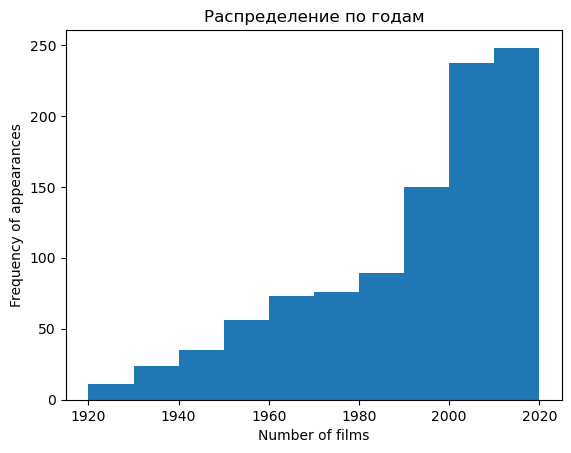

In [12]:
df['Released_Year'].plot(kind='hist', bins=10, title='Распределение по годам')
plt.xlabel('Number of films')
plt.ylabel('Frequency of appearances')
plt.show()

In [15]:
df.at[966, 'Released_Year'] = 1985

In [16]:
df.iloc[966]

Series_Title                                             Apollo 13
Released_Year                                               1985.0
Certificate                                                      U
Runtime                                                    140 min
Genre                                    Adventure, Drama, History
IMDB_Rating                                                    7.6
Overview         NASA must devise a strategy to return Apollo 1...
Meta_score                                                    77.0
Director                                                Ron Howard
Star1                                                    Tom Hanks
Star2                                                  Bill Paxton
Star3                                                  Kevin Bacon
Star4                                                  Gary Sinise
No_of_Votes                                                 269197
Gross                                                  173,837

In [17]:
average_ratings_by_year =df.groupby('Released_Year')['IMDB_Rating'].mean()
average_ratings_by_year.head(10)

Released_Year
1920.0    8.1
1921.0    8.3
1922.0    7.9
1924.0    8.2
1925.0    8.1
1926.0    8.1
1927.0    8.2
1928.0    8.1
1930.0    8.0
1931.0    8.2
Name: IMDB_Rating, dtype: float64

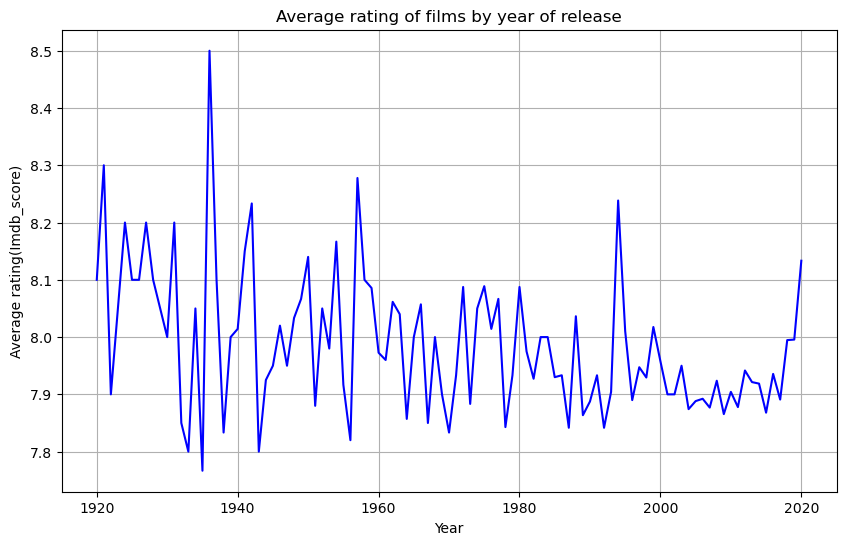

In [19]:
# Plotting a line graph of average movie ratings by year
plt.figure(figsize=(10, 6))
average_ratings_by_year.plot(kind='line', color='blue')
plt.title('Average rating of films by year of release')
plt.xlabel('Year')
plt.ylabel('Average rating(Imdb_score)')
plt.grid(True)
plt.show()

In [21]:
df['Runtime']=df['Runtime'].str.extract('(\d+)').astype(float)

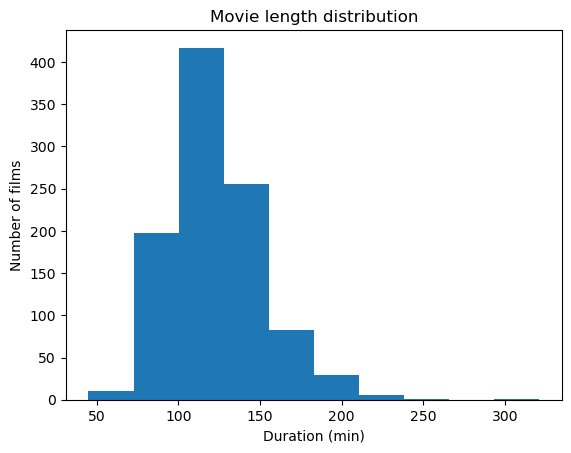

In [22]:
df['Runtime'].plot(kind='hist', bins=10, title='Movie length distribution')
plt.xlabel('Duration (min)')
plt.ylabel('Number of films')
plt.show()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   float64
 2   Certificate    1000 non-null   object 
 3   Runtime        1000 non-null   float64
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Overview       1000 non-null   object 
 7   Meta_score     1000 non-null   object 
 8   Director       1000 non-null   object 
 9   Star1          1000 non-null   object 
 10  Star2          1000 non-null   object 
 11  Star3          1000 non-null   object 
 12  Star4          1000 non-null   object 
 13  No_of_Votes    1000 non-null   int64  
 14  Gross          1000 non-null   object 
dtypes: float64(3), int64(1), object(11)
memory usage: 117.3+ KB


In [24]:
average_score_by_certificate =df.groupby('Certificate')['IMDB_Rating'].mean()
average_score_by_certificate

Certificate
            7.931683
16          8.100000
A           7.998985
Approved    7.945455
G           8.000000
GP          7.850000
PG          7.927027
PG-13       7.797674
Passed      8.020588
R           7.869863
TV-14       8.300000
TV-MA       8.100000
TV-PG       7.900000
U           7.976923
U/A         7.600000
UA          7.957143
Unrated     8.100000
Name: IMDB_Rating, dtype: float64

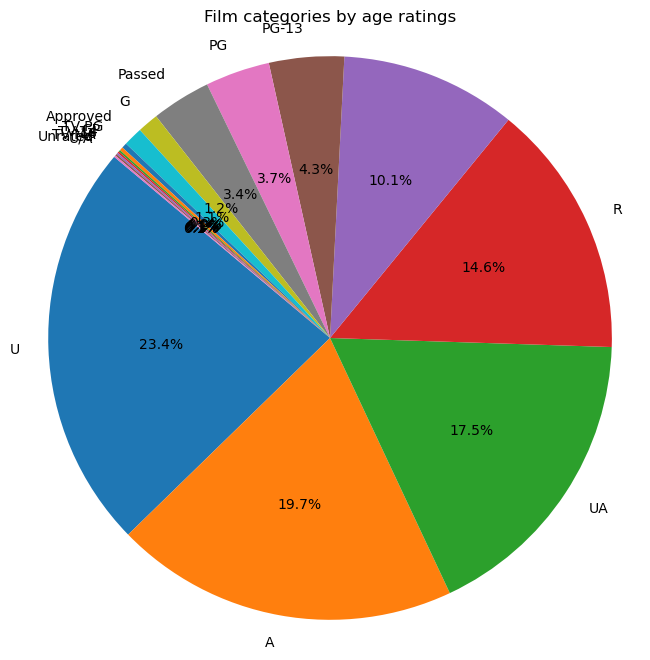

In [28]:

certificate_counts =df['Certificate'].value_counts()
certificate_counts

plt.figure(figsize=(8, 8))
plt.pie(certificate_counts, labels=certificate_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Film categories by age ratings')
plt.axis('equal') 
plt.show()

In [29]:
df['Certificate'].describe()

count     1000
unique      17
top          U
freq       234
Name: Certificate, dtype: object

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Certificate', y='IMDB_Rating', data=df, order=df['Certificate'].value_counts().index)
plt.title('Average rating of films by age rating')
plt.xlabel('Age rating category')
plt.ylabel('Rating IMDb')
plt.show()

In [31]:
genre_counts =df['Genre'].value_counts()
genre_counts

Genre
Drama                            85
Drama, Romance                   37
Comedy, Drama                    35
Comedy, Drama, Romance           31
Action, Crime, Drama             30
Biography, Drama, History        28
Crime, Drama, Thriller           28
Crime, Drama, Mystery            27
Crime, Drama                     26
Animation, Adventure, Comedy     24
Action, Adventure, Sci-Fi        21
Biography, Crime, Drama          16
Drama, War                       15
Comedy, Crime, Drama             15
Action, Adventure, Drama         14
Drama, Thriller                  14
Comedy                           13
Biography, Drama                 12
Animation, Action, Adventure     11
Action, Adventure, Comedy        10
Action, Crime, Thriller          10
Animation, Adventure, Family      9
Drama, Mystery, Thriller          9
Mystery, Thriller                 9
Biography, Drama, Sport           9
Adventure, Comedy, Drama          8
Action, Biography, Drama          7
Comedy, Drama, Family 

In [32]:
genre_counts2 = df['Genre'].str.split(', ').explode().value_counts()
genre_counts2

Genre
Drama        724
Comedy       233
Crime        209
Adventure    196
Action       189
Thriller     137
Romance      125
Biography    109
Mystery       99
Animation     82
Sci-Fi        67
Fantasy       66
History       56
Family        56
War           51
Music         35
Horror        32
Western       20
Film-Noir     19
Sport         19
Musical       17
Name: count, dtype: int64

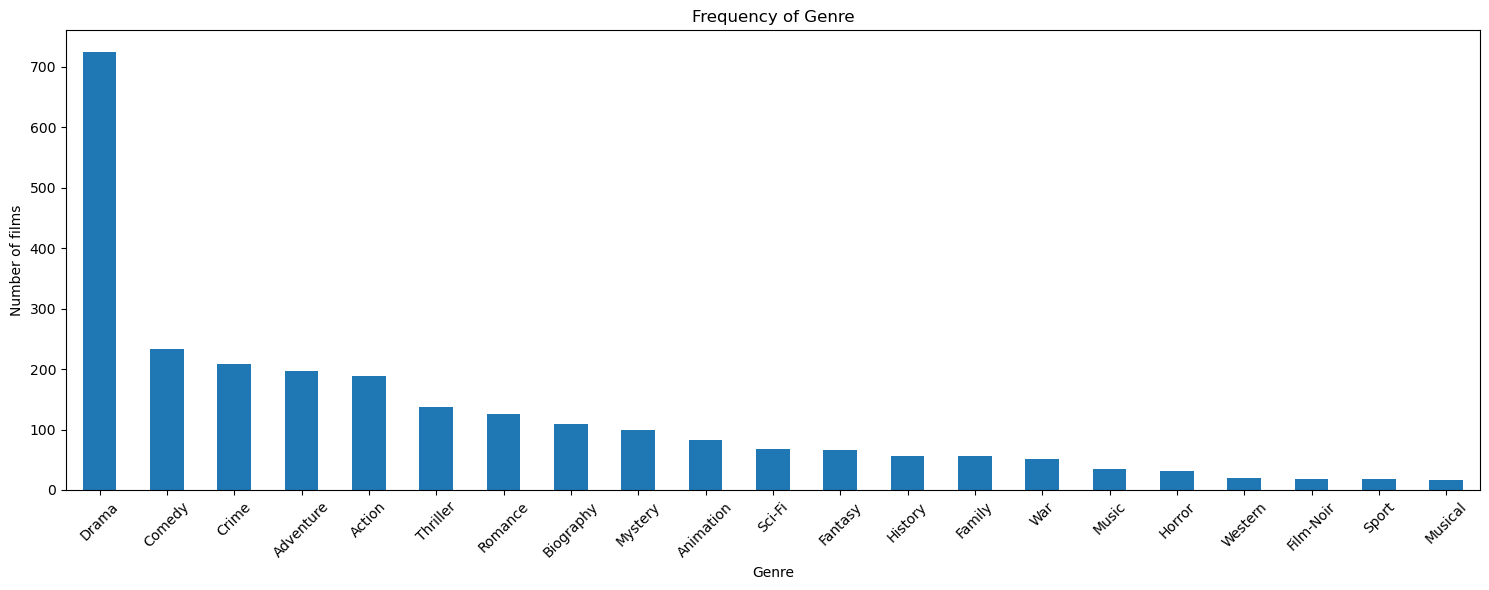

In [33]:
plt.figure(figsize=(15, 6))
genre_counts2.plot(kind='bar')
plt.title('Frequency of Genre')
plt.xlabel('Genre')
plt.ylabel('Number of films')
plt.xticks(rotation=45)  #
plt.tight_layout()
plt.show()

In [41]:
genre_counts2.index

Index(['Drama', 'Comedy', 'Crime', 'Adventure', 'Action', 'Thriller',
       'Romance', 'Biography', 'Mystery', 'Animation', 'Sci-Fi', 'Fantasy',
       'History', 'Family', 'War', 'Music', 'Horror', 'Western', 'Film-Noir',
       'Sport', 'Musical'],
      dtype='object', name='Genre')

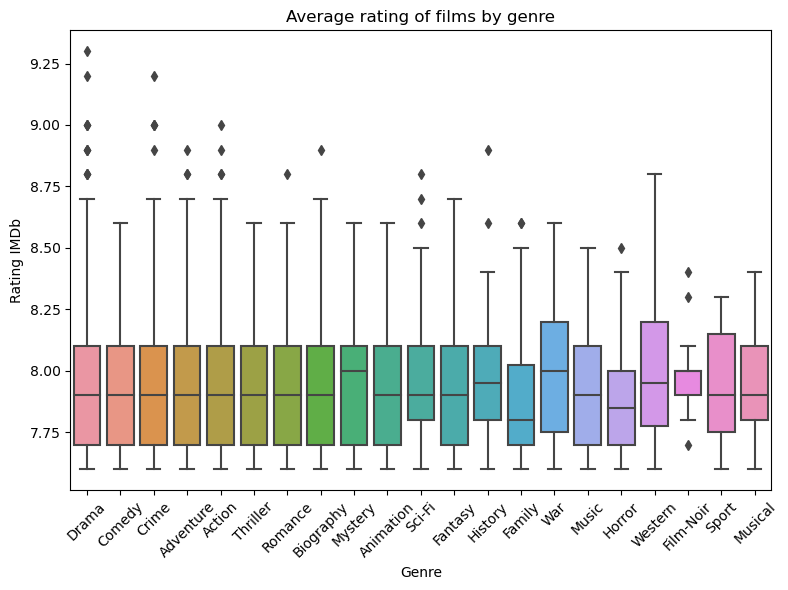

In [42]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre')

plt.figure(figsize=(8, 6))
sns.boxplot(x='Genre', y='IMDB_Rating', data=df, order=df['Genre'].value_counts().index)
plt.title('Average rating of films by genre')
plt.xlabel('Genre')
plt.ylabel('Rating IMDb')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [43]:
df

Series_Title  Released_Year  \
0                             The Shawshank Redemption         1994.0   
1                                        The Godfather         1972.0   
1                                        The Godfather         1972.0   
2                                      The Dark Knight         2008.0   
2                                      The Dark Knight         2008.0   
2                                      The Dark Knight         2008.0   
3                               The Godfather: Part II         1974.0   
3                               The Godfather: Part II         1974.0   
4                                         12 Angry Men         1957.0   
4                                         12 Angry Men         1957.0   
5        The Lord of the Rings: The Return of the King         2003.0   
5        The Lord of the Rings: The Return of the King         2003.0   
5        The Lord of the Rings: The Return of the King         2003.0   
6                                         Pulp Fiction         1994.0   
6                                         Pulp Fiction         1994.0   
7                                     Schindler's List         1993.0   
7                                     Schindler's List         1993.0   
7                                     Schindler's List         1993.0   
8                                            Inception         2010.0   
8                                            Inception         2010.0   
8                                            Inception         2010.0   
9                                           Fight Club         1999.0   
10   The Lord of the Rings: The Fellowship of the Ring         2001.0   
10   The Lord of the Rings: The Fellowship of the Ring         2001.0   
10   The Lord of the Rings: The Fellowship of the Ring         2001.0   
11                                        Forrest Gump         1994.0   
11                                        Forrest Gump         1994.0   
12                     Il buono, il brutto, il cattivo         1966.0   
13               The Lord of the Rings: The Two Towers         2002.0   
13               The Lord of the Rings: The Two Towers         2002.0   
13               The Lord of the Rings: The Two Towers         2002.0   
14                                          The Matrix         1999.0   
14                                          The Matrix         1999.0   
15                                          Goodfellas         1990.0   
15                                          Goodfellas         1990.0   
15                                          Goodfellas         1990.0   
16      Star Wars: Episode V - The Empire Strikes Back         1980.0   
16      Star Wars: Episode V - The Empire Strikes Back         1980.0   
16      Star Wars: Episode V - The Empire Strikes Back         1980.0   
17                     One Flew Over the Cuckoo's Nest         1975.0   
18                                            Hamilton         2020.0   
18                                            Hamilton         2020.0   
18                                            Hamilton         2020.0   
19                                        Gisaengchung         2019.0   
19                                        Gisaengchung         2019.0   
19                                        Gisaengchung         2019.0   
20                                     Soorarai Pottru         2020.0   
21                                        Interstellar         2014.0   
21                                        Interstellar         2014.0   
21                                        Interstellar         2014.0   
22                                      Cidade de Deus         2002.0   
22                                      Cidade de Deus         2002.0   
23                       Sen to Chihiro no kamikakushi         2001.0   
23                       Sen to Chihiro no kamikakushi         2001.0   
23                       Se

In [44]:
df['IMDB_Rating'].plot(kind='hist', bins=10, title='Distribution by ratings on IMDB_Rating')
plt.xlabel('Rating')
plt.ylabel('Number of films')
plt.show()

In [56]:
top_directors = df['Director'].value_counts()
top_directors

Director
Alfred Hitchcock                    37
Hayao Miyazaki                      33
Steven Spielberg                    31
Martin Scorsese                     27
Akira Kurosawa                      26
Billy Wilder                        24
Quentin Tarantino                   21
Woody Allen                         21
Howard Hawks                        21
Christopher Nolan                   21
Stanley Kubrick                     21
David Fincher                       21
Joel Coen                           18
Ridley Scott                        17
Charles Chaplin                     17
Wes Anderson                        17
Clint Eastwood                      17
Rob Reiner                          17
Alfonso Cuarón                      14
Denis Villeneuve                    14
Ron Howard                          14
John Huston                         14
Robert Zemeckis                     14
John Ford                           13
Roman Polanski                      13
Peter Jackson   

In [57]:
top_directors = df['Director'].value_counts().head(10).index.tolist()

In [58]:
top_directors

['Alfred Hitchcock',
 'Hayao Miyazaki',
 'Steven Spielberg',
 'Martin Scorsese',
 'Akira Kurosawa',
 'Billy Wilder',
 'Quentin Tarantino',
 'Woody Allen',
 'Howard Hawks',
 'Christopher Nolan']

In [61]:
df_top_directors = df[df['Director'].isin(top_directors)]
df_top_directors

Series_Title  Released_Year Certificate  Runtime  \
2                       The Dark Knight         2008.0          UA    152.0   
2                       The Dark Knight         2008.0          UA    152.0   
2                       The Dark Knight         2008.0          UA    152.0   
6                          Pulp Fiction         1994.0           A    154.0   
6                          Pulp Fiction         1994.0           A    154.0   
7                      Schindler's List         1993.0           A    195.0   
7                      Schindler's List         1993.0           A    195.0   
7                      Schindler's List         1993.0           A    195.0   
8                             Inception         2010.0          UA    148.0   
8                             Inception         2010.0          UA    148.0   
8                             Inception         2010.0          UA    148.0   
15                           Goodfellas         1990.0           A    146.0   
15                           Goodfellas         1990.0           A    146.0   
15                           Goodfellas         1990.0           A    146.0   
21                         Interstellar         2014.0          UA    169.0   
21                         Interstellar         2014.0          UA    169.0   
21                         Interstellar         2014.0          UA    169.0   
23        Sen to Chihiro no kamikakushi         2001.0           U    125.0   
23        Sen to Chihiro no kamikakushi         2001.0           U    125.0   
23        Sen to Chihiro no kamikakushi         2001.0           U    125.0   
24                  Saving Private Ryan         1998.0           R    169.0   
24                  Saving Private Ryan         1998.0           R    169.0   
31                 Shichinin no samurai         1954.0           U    207.0   
31                 Shichinin no samurai         1954.0           U    207.0   
31                 Shichinin no samurai         1954.0           U    207.0   
36                         The Prestige         2006.0           U    130.0   
36                         The Prestige         2006.0           U    130.0   
36                         The Prestige         2006.0           U    130.0   
37                         The Departed         2006.0           A    151.0   
37                         The Departed         2006.0           A    151.0   
37                         The Departed         2006.0           A    151.0   
49                               Psycho         1960.0           A    109.0   
49                               Psycho         1960.0           A    109.0   
49                               Psycho         1960.0           A    109.0   
62                     Django Unchained         2012.0           A    165.0   
62                     Django Unchained         2012.0           A    165.0   
63                The Dark Knight Rises         2012.0          UA    164.0   
63                The Dark Knight Rises         2012.0          UA    164.0   
69                              Memento         2000.0          UA    113.0   
69                              Memento         2000.0          UA    113.0   
70                        Mononoke-hime         1997.0           U    134.0   
70                        Mononoke-hime         1997.0           U    134.0   
70                        Mononoke-hime         1997.0           U    134.0   
72              Raiders of the Lost Ark         1981.0           A    115.0   
72              Raiders of the Lost Ark         1981.0           A    115.0   
77                    Tengoku to jigoku         1963.0                143.0   
77                    Tengoku to jigoku         1963.0                143.0   
77                    Tengoku to jigoku         1963.0                143.0   
79          Witness for the Prosecution         1957.0           U    116.0   
79          Witness for the Prosecution         1957.0           U    116.0  

In [66]:
pd.to_numeric(df['IMDB_Rating'])

0      9.3
1      9.2
1      9.2
2      9.0
2      9.0
2      9.0
3      9.0
3      9.0
4      9.0
4      9.0
5      8.9
5      8.9
5      8.9
6      8.9
6      8.9
7      8.9
7      8.9
7      8.9
8      8.8
8      8.8
8      8.8
9      8.8
10     8.8
10     8.8
10     8.8
11     8.8
11     8.8
12     8.8
13     8.7
13     8.7
13     8.7
14     8.7
14     8.7
15     8.7
15     8.7
15     8.7
16     8.7
16     8.7
16     8.7
17     8.7
18     8.6
18     8.6
18     8.6
19     8.6
19     8.6
19     8.6
20     8.6
21     8.6
21     8.6
21     8.6
22     8.6
22     8.6
23     8.6
23     8.6
23     8.6
24     8.6
24     8.6
25     8.6
25     8.6
25     8.6
26     8.6
26     8.6
26     8.6
27     8.6
27     8.6
27     8.6
28     8.6
28     8.6
28     8.6
29     8.6
29     8.6
29     8.6
30     8.6
30     8.6
30     8.6
31     8.6
31     8.6
31     8.6
32     8.6
32     8.6
32     8.6
33     8.5
33     8.5
33     8.5
34     8.5
34     8.5
35     8.5
35     8.5
35     8.5
36     8.5
36     8.5

In [68]:
df.dtypes

Series_Title      object
Released_Year    float64
Certificate       object
Runtime          float64
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score        object
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [70]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Director', y='IMDB_Rating', data=df_top_directors, order=top_directors)
plt.title('Average rating of films by director')
plt.xlabel('Director')
plt.ylabel('IMDB_Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()